In [1]:
pip install tensorflow keras streamlit opencv-python matplotlib


     -------------------------------------- 331.8/331.8 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 10.2/10.2 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 39.0/39.0 MB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 8.1/8.1 MB 3.8 MB/s eta 0:00:00
     -------------------------------------- 135.8/135.8 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB 3.9 MB/s eta 0:00:00
     -------------------------------------- 436.9/436.9 kB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 64.7/64.7 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 60.4/60.4 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Paths (change these to your dataset folders)
train_path = "C:/RG/DS/Projects/Proj 6 Tumor analysis/train-20251109T043924Z-1-001/train"
test_path = "C:/RG/DS/Projects/Proj 6 Tumor analysis/test-20251109T040639Z-1-001/test"

# Image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data generators (automatically label from folder names)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

print("Classes:", train_gen.class_indices)


Found 1695 images belonging to 4 classes.
Found 246 images belonging to 4 classes.
Classes: {'glioma': 0, 'meningioma': 1, 'no_tumor': 2, 'pituitary': 3}


In [4]:
from tensorflow.keras import layers, models

def build_simple_cnn(input_shape=(224,224,3), num_classes=4):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_cnn = build_simple_cnn(num_classes=train_gen.num_classes)
model_cnn.summary()


c:\Users\sugan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
pip install scipy


     ---------------------------------------- 38.7/38.7 MB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
history_cnn = model_cnn.fit(
    train_gen,
    epochs=10,
    validation_data=test_gen
)

# Save model
model_cnn.save("custom_cnn_brain_tumor.h5")


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 48s 887ms/step - accuracy: 0.4997 - loss: 1.2464 - val_accuracy: 0.6789 - val_loss: 0.8888
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 45s 819ms/step - accuracy: 0.6407 - loss: 0.9302 - val_accuracy: 0.7033 - val_loss: 0.7013
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 38s 720ms/step - accuracy: 0.6956 - loss: 0.7841 - val_accuracy: 0.7276 - val_loss: 0.6971
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 762ms/step - accuracy: 0.7162 - loss: 0.7422 - val_accuracy: 0.6911 - val_loss: 0.7029
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 762ms/step - accuracy: 0.7127 - loss: 0.7638 - val_accuracy: 0.7642 - val_loss: 0.6358
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 770ms/step - accuracy: 0.7717 - loss: 0.6165 - val_accuracy: 0.8130 - val_loss: 0.4949
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 40s 758ms/step - accuracy: 0.7687 - loss: 0.6156 - val_accuracy: 0.7561 - val_loss: 0.6701
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 40s 760ms/step - accuracy: 0.7799 - loss: 0.5756 - val_accu

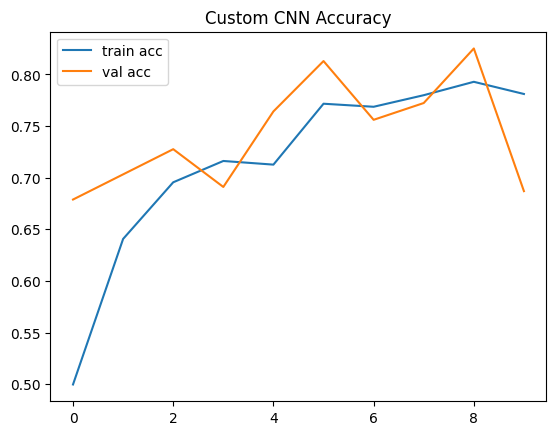

In [8]:
plt.plot(history_cnn.history['accuracy'], label='train acc')
plt.plot(history_cnn.history['val_accuracy'], label='val acc')
plt.title('Custom CNN Accuracy')
plt.legend()
plt.show()


In [9]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze base model
for layer in base_model.layers:
    layer.trainable = False

# Add new layers
x = layers.Flatten()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.4)(x)
output = layers.Dense(train_gen.num_classes, activation='softmax')(x)

model_resnet = models.Model(inputs=base_model.input, outputs=output)
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_resnet.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 41s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 36,433,412 (138.98 MB)

 Trainable params: 12,845,700 (49.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
history_resnet = model_resnet.fit(
    train_gen,
    epochs=5,
    validation_data=test_gen
)

# Save model
model_resnet.save("resnet_brain_tumor.h5")


Epoch 1/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.3493 - loss: 3.4757 - val_accuracy: 0.4756 - val_loss: 1.3219
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.4094 - loss: 1.3327 - val_accuracy: 0.4553 - val_loss: 1.3011
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.3941 - loss: 1.3376 - val_accuracy: 0.4431 - val_loss: 1.2906
Epoch 4/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.4242 - loss: 1.2865 - val_accuracy: 0.4634 - val_loss: 1.2822
Epoch 5/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.4171 - loss: 1.2736 - val_accuracy: 0.4553 - val_loss: 1.2540


In [11]:
loss, acc = model_resnet.evaluate(test_gen)
print("Test Accuracy:", acc)


8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4553 - loss: 1.2540
Test Accuracy: 0.45528456568717957


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted: glioma


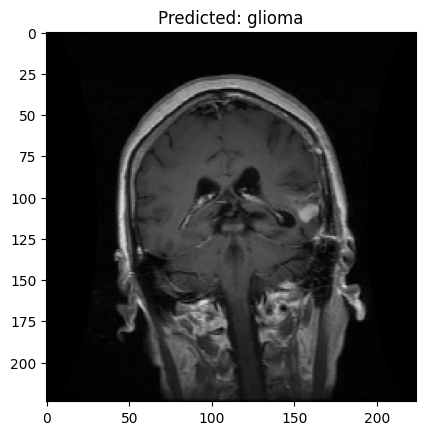

In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Pick one image to test
img_path = os.path.join(test_path, 'glioma', os.listdir(os.path.join(test_path, 'glioma'))[0])
img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model_resnet.predict(img_array)
class_names = list(train_gen.class_indices.keys())

print("Predicted:", class_names[np.argmax(pred)])
plt.imshow(img)
plt.title(f"Predicted: {class_names[np.argmax(pred)]}")
plt.show()
